In [1]:
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import h5py
from utils import get_eval_stats

In [2]:
trajectories = []
b = "0.001"
target_protein = "7JJK"
n = 1000
p_range = [5]#range(1, 10, 2)

hdf5_data = '/home/shai/BLISS_Experiments/DRAKES/DRAKES/drakes_protein/fmif/eval_results/hdf5_data/mh_trajectories.hdf5'
with h5py.File(hdf5_data, 'r') as f:
    protein_name = "_" + target_protein if target_protein is not None else ""
    for p in p_range:
        name = f"p0.{p}_b{b}_n{n}{protein_name}"
        data = f[name][:] # type: ignore
        trajectories.append(data)

In [3]:
test_dir = "/home/shai/BLISS_Experiments/DRAKES/DRAKES/drakes_protein/fmif/eval_results/test/"
drakes_df = pd.read_csv(test_dir + "drakes_test.csv")
pretrained_df = pd.read_csv(test_dir + "pretrained_test.csv")
summary_func = np.mean
drakes_eval_stats = get_eval_stats(drakes_df, target_protein=target_protein, summary_func=summary_func)
pre_eval_stats = get_eval_stats(pretrained_df, target_protein=target_protein, summary_func=summary_func)
drakes_ddg_align = drakes_eval_stats['ddg_align']
pre_ddg_align = pre_eval_stats['ddg_align']

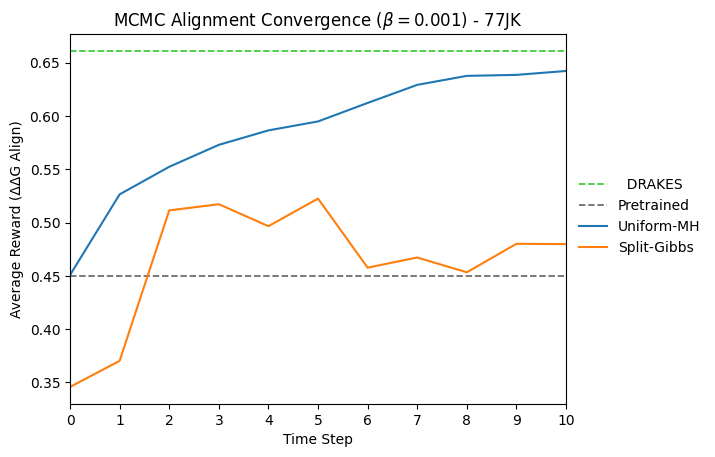

In [14]:
targ_trajectory = []
with h5py.File(hdf5_data, 'r') as f:
    b = 0.001
    protein_name = "_7JJK"
    name1 = f"uniform_p{0.5}_b{b}_n{10}{protein_name}"
    name2 = f"split-gibbs_b{b}_n{10}{protein_name}"
    targ_trajectory.append(f[name1][:]) # type: ignore
    targ_trajectory.append(f[name2][:]) # type: ignore

targ_names = ["Uniform-MH", "Split-Gibbs"]

n = min(len(t) for t in targ_trajectory)
step_nums = range(0, n)

fig, ax = plt.subplots()
beta_str = r"($\beta=0.001$)"
ax.axhline(drakes_ddg_align, color='limegreen', linestyle='--',linewidth=1.25, label=f'  DRAKES')
ax.axhline(pre_ddg_align, color='dimgray', linestyle='--', label='Pretrained', linewidth=1.25)

for i, traj in enumerate(targ_trajectory):
    ax.plot(step_nums, traj[:n], label=f"{targ_names[i]}")

ax.legend(loc='center', bbox_to_anchor=(1.015, 0.5), bbox_transform=fig.transFigure, frameon=False)
ax.set(xlim=(1, n-1))

plt.xlabel("Time Step")
plt.xticks(np.arange(0,n,1))
# plt.xscale("log")
plt.ylabel("Average Reward (ΔΔG Align)")
plt.title(r"MCMC Alignment Convergence ($\beta=0.0 01$)" + f" - 77JK")
plt.show()

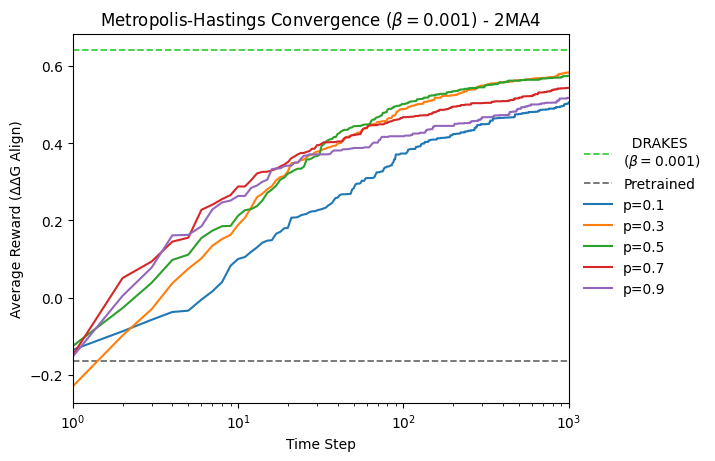

In [54]:
step_nums = range(1, len(trajectories[0]) + 1)

fig, ax = plt.subplots()
beta_str = r"($\beta=0.001$)"
# ax.hlines(drakes_ddg_align, 0, 9, color='limegreen', linestyle='--', label=f'  DRAKES \n{beta_str}',linewidth=1.25)
# ax.hlines(drakes_ddg_align, 20, 55, color='limegreen', linestyle='--',linewidth=1.25)
ax.axhline(drakes_ddg_align, color='limegreen', linestyle='--',linewidth=1.25, label=f'  DRAKES \n{beta_str}')
ax.axhline(pre_ddg_align, color='dimgray', linestyle='--', label='Pretrained', linewidth=1.25)
# ax.axhline(bon50_ddg_align, color='mediumslateblue', linestyle='--', label='BoN-50', linewidth=1.25)
# ax.hlines(bon50_ddg_align, 0, 20, color='mediumslateblue', linestyle='--', label='BoN-50', linewidth=1.25)
# ax.hlines(bon10_ddg_align, 0, 6, color='mediumorchid', linestyle='--', label='BoN-10', linewidth=1.25)
# ax.hlines(bon50_ddg_align, 45, 55, color='mediumslateblue', linestyle='--', linewidth=1.25)
# ax.hlines(bon10_ddg_align, 14, 55, color='mediumorchid', linestyle='--', linewidth=1.25)

for i, traj in enumerate(trajectories):
    ax.plot(step_nums, traj, label=f"p=0.{p_range[i]}")

ax.legend(loc='center', bbox_to_anchor=(1.015, 0.5), bbox_transform=fig.transFigure, frameon=False)
ax.set(xlim=(1, len(trajectories[0])))

plt.xlabel("Time Step")
plt.xscale("log")
plt.ylabel("Average Reward (ΔΔG Align)")
plt.title(r"Metropolis-Hastings Convergence ($\beta=0.0 01$)" + f" - {target_protein}")
plt.show()

In [18]:
import random 

def evaluate_ddg_ll_corr_mult(df_list, labels, protein, title='', selected_samples=None):
    for i, df in enumerate(df_list):
        if protein is not None:
            df = df[df['protein_name'] == protein + ".pdb"]
        pre_ddg = df['ddg_eval']
        pre_protgpt = df['loglikelihood']
        if selected_samples is not None and len(pre_ddg) > selected_samples: # type: ignore
            ids = random.sample(range(len(pre_ddg)), selected_samples) # type: ignore
            pre_ddg = np.array(pre_ddg)[ids]
            pre_protgpt = np.array(pre_protgpt)[ids]
        plt.scatter(pre_ddg, pre_protgpt, label=labels[i])
    plt.xlabel('ΔΔG Eval')
    plt.ylabel('Log Likelihood')
    plt.title(title)
    plt.legend(frameon=True)
    plt.show()

In [19]:
bon10_df = pd.read_csv(test_dir + "pretrained_test_ddg_bon_N=10.csv")
bon50_df = pd.read_csv(test_dir + "pretrained_test_ddg_bon_N=50.csv")
p5b001_2ma4_df = pd.read_csv(test_dir + "pretrained_2MA4_ddg_bon_N=1_mhn=1000_p=0.5_beta=0.001.csv")
p5b001_7jjk_df = pd.read_csv(test_dir + "pretrained_7JJK_ddg_bon_N=1_mhn=50_p=0.5_beta=0.001.csv")
bon10_eval_stats = get_eval_stats(bon10_df, target_protein=target_protein, summary_func=summary_func)
bon50_eval_stats = get_eval_stats(bon50_df, target_protein=target_protein, summary_func=summary_func)
bon10_ddg_align = bon10_eval_stats['ddg_align']
bon50_ddg_align = bon50_eval_stats['ddg_align']

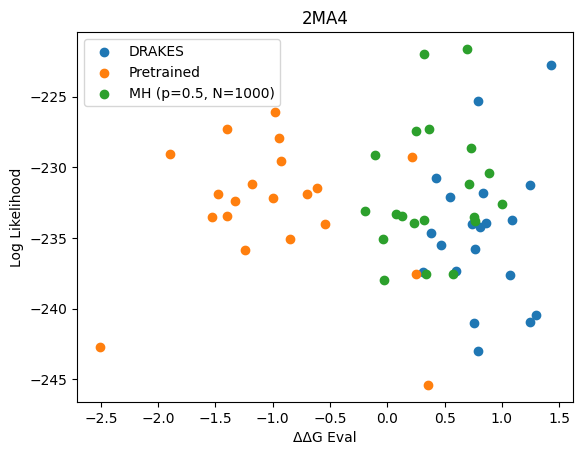

In [20]:
df_list = [drakes_df, pretrained_df, p5b001_2ma4_df]
labels = ["DRAKES", "Pretrained", "MH (p=0.5, N=1000)"]
protein = '2MA4'
evaluate_ddg_ll_corr_mult(df_list, labels, protein, title=f'{protein}', selected_samples=20)

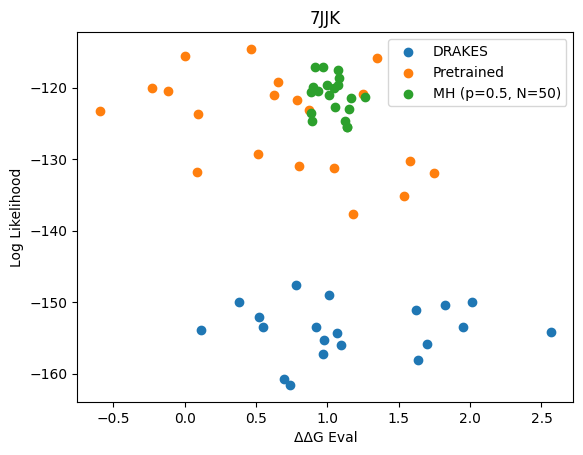

In [21]:
df_list = [drakes_df, pretrained_df, p5b001_7jjk_df]
labels = ["DRAKES", "Pretrained", "MH (p=0.5, N=50)"]
protein = '7JJK'
evaluate_ddg_ll_corr_mult(df_list, labels, protein, title=f'{protein}', selected_samples=20)